In [2]:
import gzip
import numpy as np
from keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/mnist/train-images-idx3-ubyte.gz")
X_test = open_images("../data/mnist/t10k-images-idx3-ubyte.gz")

X_train = X_train / 255.
X_test = X_test / 255.

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

encoder = Sequential()
encoder.add(Conv2D(1, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)))
encoder.add(MaxPooling2D(pool_size=(2, 2)))
encoder.add(Conv2D(2, kernel_size=(3, 3), padding="same", activation="relu"))
encoder.add(MaxPooling2D(pool_size=(2, 2)))

decoder = Sequential()
decoder.add(Conv2D(2, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(7, 7, 2)))
decoder.add(UpSampling2D(size=(2, 2)))
decoder.add(Conv2D(4, kernel_size=(3, 3), padding="same", activation="relu"))
decoder.add(UpSampling2D(size=(2, 2)))
decoder.add(Conv2D(1, kernel_size=(3, 3), padding="same", activation="sigmoid"))

model = Sequential()
model.add(encoder)
model.add(decoder)

In [7]:
model.compile(optimizer="rmsprop", loss="mse")

In [8]:
model.fit(
    X_train.reshape(-1, 28, 28, 1), 
    X_train.reshape(-1, 28, 28, 1), 
    batch_size=32, 
    epochs=10)

Epoch 1/10
60000/60000 [==============================] - 11s 183us/step - loss: 0.0372
Epoch 2/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0176
Epoch 3/10
60000/60000 [==============================] - 10s 158us/step - loss: 0.0152
Epoch 4/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0145
Epoch 5/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.0142
Epoch 6/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0140
Epoch 7/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0138
Epoch 8/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0137
Epoch 9/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0136
Epoch 10/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.0135


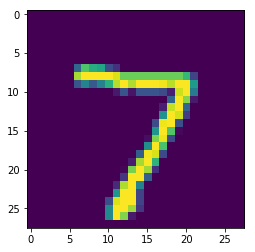

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(X_test[0])
plt.show()

In [10]:
X_test[0].shape

(28, 28)

In [11]:
28 * 28

784

In [12]:
encoded = encoder.predict(X_test[0].reshape(-1, 28, 28, 1))

In [13]:
encoded.shape

(1, 7, 7, 2)

In [15]:
7 * 7 * 2

98

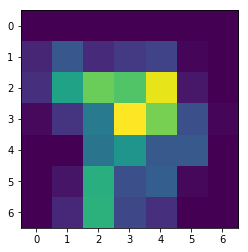

In [24]:
plt.imshow(encoded[0, :, :, 1])
plt.show()

In [25]:
decoded = decoder.predict(encoded)

In [26]:
decoded.shape

(1, 28, 28, 1)

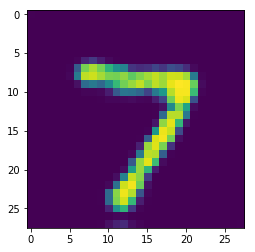

In [27]:
plt.imshow(decoded.reshape(28, 28))
plt.show()

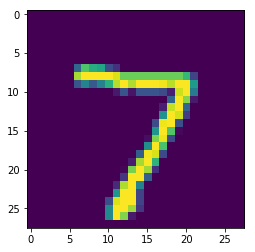

In [28]:
plt.imshow(X_test[0])
plt.show()